In [300]:
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sktime.classification.compose import ComposableTimeSeriesForestClassifier
from sktime.datasets import load_arrow_head
from sktime.utils.slope_and_trend import _slope
import pandas as pd
import plotly.express as px
from sktime.forecasting.compose import DirectTabularRegressionForecaster,DirectTimeSeriesRegressionForecaster, RecursiveTabularRegressionForecaster, TransformedTargetForecaster, ForecastingPipeline
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import euclidean_distances
from sktime.utils.plotting import plot_series
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

from sktime.classification.compose import ComposableTimeSeriesForestClassifie
from sktime.datasets import load_arrow_head
from sktime.utils.slope_and_trend import _slope
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sktime.transformations.series.difference import Differencer
from sktime.transformations.series.date import DateTimeFeatures

from sktime.transformations.series.acf import AutoCorrelationTransformer
from sktime.datasets import load_arrow_head, load_basic_motions
from sktime.transformations.panel.tsfresh import TSFreshFeatureExtractor
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Detrender,ConditionalDeseasonalizer, Deseasonalizer



In [2]:
df = pd.read_parquet('stat_product_ibe3_breakdown_hourly_2021.parquet')

In [290]:

# px.line(df, x='trx_hour', y='product_count', log_y=False)

In [9]:
ts = df.set_index('trx_hour')

In [26]:
from sktime.forecasting.base import ForecastingHorizon
t = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range(df.trx_hour.min(), periods=len(df.trx_hour), freq="H")), is_relative=False
)


In [31]:
ts = pd.DataFrame(index=t)
ts['product_count'] = df['product_count'].values

In [32]:
ts

product_count
2021-01-01 00:00            272
2021-01-01 01:00            301
2021-01-01 02:00            272
2021-01-01 03:00            212
2021-01-01 04:00            210
...                         ...
2021-10-31 19:00           1101
2021-10-31 20:00            887
2021-10-31 21:00            829
2021-10-31 22:00            731
2021-10-31 23:00            526

[7296 rows x 1 columns]

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='product_count'>)

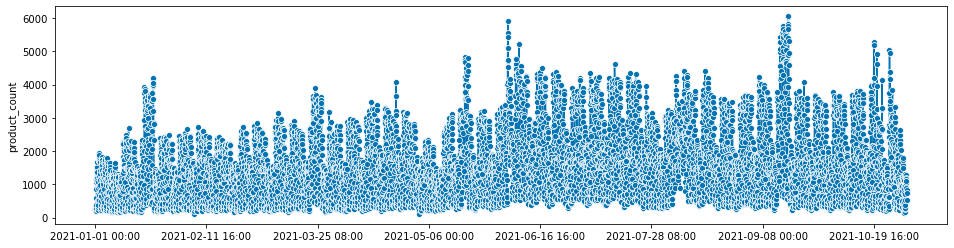

In [66]:
class Saver:
    pass

In [311]:
class CustomRegressor(BaseForecaster):
    def __init__(self):
        # estimators should precede parameters
        #  if estimators have default values, set None and initalize below

        # important: no checking or other logic should happen here

        # todo: default estimators should have None arg defaults
        #  and be initialized here
        #  do this only with default estimators, not with parameters
        # if est2 is None:
        #     self.estimator = MyDefaultEstimator()

        # todo: change "MyForecaster" to the name of the class
        super(CustomRegressor, self).__init__()

        # todo: if tags of estimator depend on component tags, set these here
        #  only needed if estimator is a composite
        #  tags set in the constructor apply to the object and override the class
        #
        # example 1: conditional setting of a tag
        # if est.foo == 42:
        #   self.set_tags(handles-missing-data=True)
        # example 2: cloning tags from component
        #   self.clone_tags(est2, ["enforce_index_type", "handles-missing-data"])

    # todo: implement this, mandatory
    def _fit(self, y, X=None, fh=None):
        """Fit forecaster to training data.

            core logic

        Parameters
        ----------
        y : pd.Series
            Target time series to which to fit the forecaster.
        fh : int, list, np.array or ForecastingHorizon, optional (default=None)
            The forecasters horizon with the steps ahead to to predict.
        X : pd.DataFrame, optional (default=None)

        Returns
        -------
        self : returns an instance of self.
        """
        
        Saver.X = X 
        Saver.y = y

        # implement here
        # IMPORTANT: avoid side effects to y, X, fh
        #
        # any model parameters should be written to attributes ending in "_"
        #  attributes set by the constructor must not be overwritten
        #  if used, estimators should be cloned to attributes ending in "_"
        #  the clones, not the originals shoudld be used or fitted if needed

    # todo: implement this, mandatory
    def _predict(self, fh, X=None, return_pred_int=False, alpha=0.95):
        """Forecast time series at future horizon.

            core logic

        Parameters
        ----------
        fh : int, list, np.array or ForecastingHorizon
            Forecasting horizon
        X : pd.DataFrame, optional (default=None)
            Exogenous time series
        return_pred_int : bool, optional (default=False)
            If True, returns prediction intervals for given alpha values.
        alpha : float or list, optional (default=0.95)

        Returns
        -------
        y_pred : pd.Series
            Point predictions
        y_pred_int : pd.DataFrame - only if return_pred_int=True
            Prediction intervals
        """

        # implement here
        # IMPORTANT: avoid side effects to X, fh

    # todo: consider implementing this, optional
    # if not implementing, delete the _update method

NameError: name 'BaseForecaster' is not defined

In [114]:
forecaster = TransformedTargetForecaster(
    [
       ('detrender', Detrender(forecaster=PolynomialTrendForecaster(degree=1)) ),
        ('deseason', ConditionalDeseasonalizer(sp=24)),
        ('deseason2', ConditionalDeseasonalizer(sp=24*7)),
#         ("deseasonalize_daily", Deseasonalizer(model="multiplicative", sp=24)),
#         ("deseasonalize_weekly", Deseasonalizer(model="multiplicative", sp=24*7)),
        ("forecast", CustomRegressor()),
    ]
)
forecaster.fit(y_train, fh=fh)
# y_pred = forecaster.predict(fh)
# plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
# mean_absolute_percentage_error(y_pred, y_test)

TransformedTargetForecaster(steps=[('detrender',
                                    Detrender(forecaster=PolynomialTrendForecaster())),
                                   ('deseason',
                                    ConditionalDeseasonalizer(sp=24)),
                                   ('deseason2',
                                    ConditionalDeseasonalizer(sp=168)),
                                   ('forecast', CustomRegressor())])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:>)

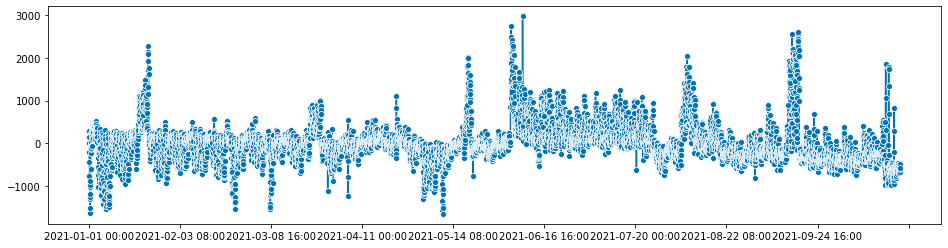

In [115]:
Saver.y
plot_series(Saver.y[:])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='product_count'>)

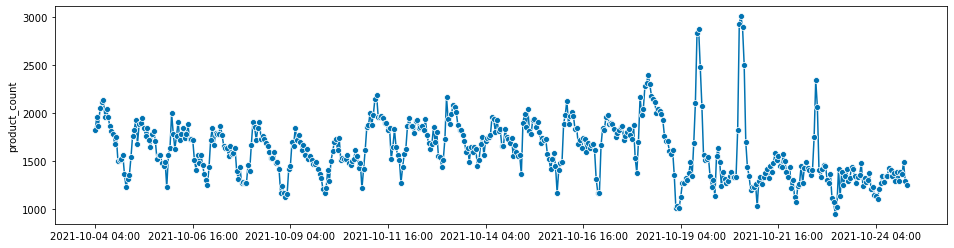

In [89]:
Saver.y
plot_series(Saver.y[-500:])

(<Figure size 1152x288 with 1 Axes>, <AxesSubplot:ylabel='product_count'>)

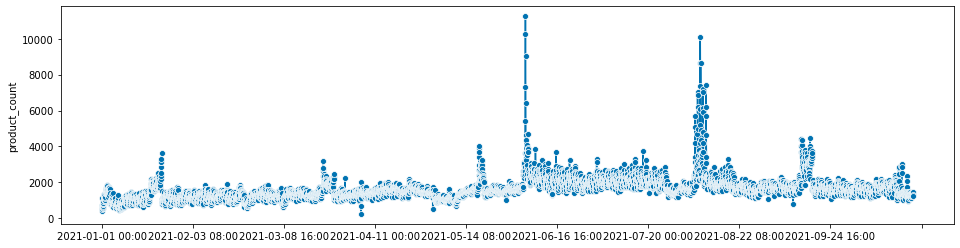

In [92]:
Saver.y
plot_series(Saver.y[:])

In [96]:
Saver.X

In [4]:
df

trx_hour  product_count        price
5822 2021-01-01 00:00:00            272   1943959.00
3355 2021-01-01 01:00:00            301   2282443.00
3667 2021-01-01 02:00:00            272   2068431.00
1713 2021-01-01 03:00:00            212   1473772.25
3465 2021-01-01 04:00:00            210   2440519.00
...                  ...            ...          ...
4078 2021-10-31 19:00:00           1101  13463075.17
2321 2021-10-31 20:00:00            887   7800320.30
3208 2021-10-31 21:00:00            829   6762031.72
3606 2021-10-31 22:00:00            731   5793285.01
3253 2021-10-31 23:00:00            526   4017632.00

[7296 rows x 3 columns]

In [4]:
sales = pd.DataFrame({
  'holiday': 'sale',
  'ds': pd.to_datetime(['2021-09-14', '2020-06-23','2020-09-15', '2020-11-10', '2020-12-15','2021-01-19', '2021-03-23']),
  'lower_window': 0,
  'upper_window': 4,
})
import datetime
sale_dates=[]
for _, row in sales.iterrows():
    for shift in range(row.lower_window, row.upper_window+1):
        sale_dates.append(row.ds+datetime.timedelta(days=shift))

In [5]:
import os
from prophet import Prophet
import matplotlib.pyplot as plt
import tqdm

# os.makedirs('./reports',exist_ok=True)

data = df.reset_index()[['trx_hour', 'product_count']].rename(columns={'trx_hour':'ds','product_count':'y'}) 

In [6]:
data

ds     y
0    2021-01-01 00:00:00   272
1    2021-01-01 01:00:00   301
2    2021-01-01 02:00:00   272
3    2021-01-01 03:00:00   212
4    2021-01-01 04:00:00   210
...                  ...   ...
7291 2021-10-31 19:00:00  1101
7292 2021-10-31 20:00:00   887
7293 2021-10-31 21:00:00   829
7294 2021-10-31 22:00:00   731
7295 2021-10-31 23:00:00   526

[7296 rows x 2 columns]

In [10]:
# !pip install pystan==2.19.1.1 -U --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 16.2 MB 2.4 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=29310196 sha256=59eeb6a9d24ae2f7ba5a71e0872008c4fce8d9109f034cd89467506f18fbc211
  Stored in directory: /tmp/pip-ephem-wheel-cache-pto9s37e/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
# !pip install prophet --force-reinstall --user

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 65 kB 2.9 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 1.9 MB 5.0 MB/s            
     |████████████████████████████████| 49 kB 80.8 MB/s            
     |████████████████████████████████| 16.2 MB 109.4 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 15.7 MB 58.3 MB/s            
     |████████████████████████████████| 11.5 MB 7.2 MB/s             
     |████████████████████████████████| 10.3 MB 8.5 MB/s            
     |████████████████████████████████| 47 kB 15.3 MB/s            
     |████████████████████████████████| 155 kB 10.9 MB/s            
     |████████████████████████████████| 247 kB 10.8 MB/s            
     |████████████████████████████████| 76 kB 12.7 MB/s            
     |████████████████████████████████| 218 kB 10.9 MB/s            
     |████████████

In [49]:
m = Prophet(
    weekly_seasonality = True,
    holidays=sales,
    daily_seasonality = True,
#     yearly_seasonality = True,
#     n_changepoints = 3,
    interval_width=0.99,
#     mcmc_samples = 300,
    seasonality_mode='multiplicative',
 
)

past = data#[:-31]
future=data.drop(columns=['y'])

m.fit(past)
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


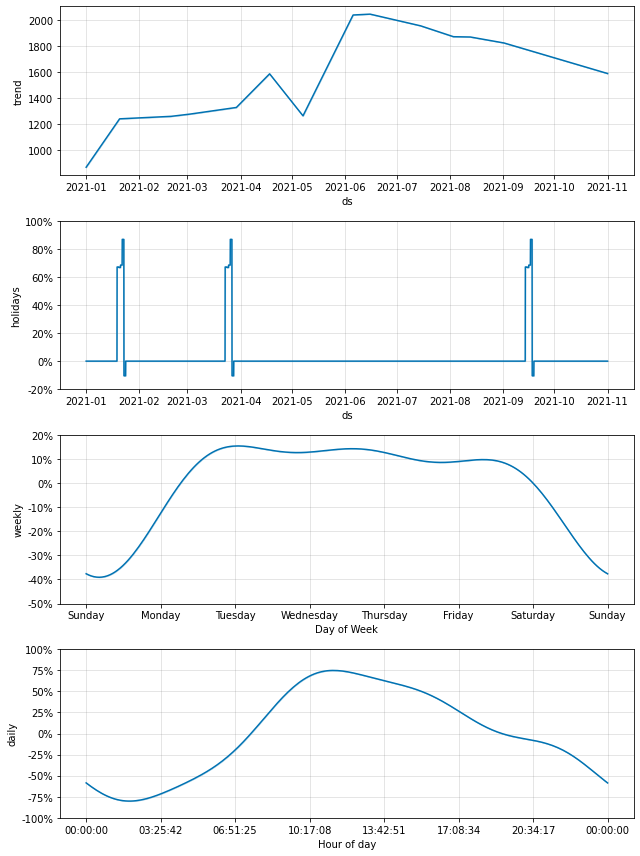

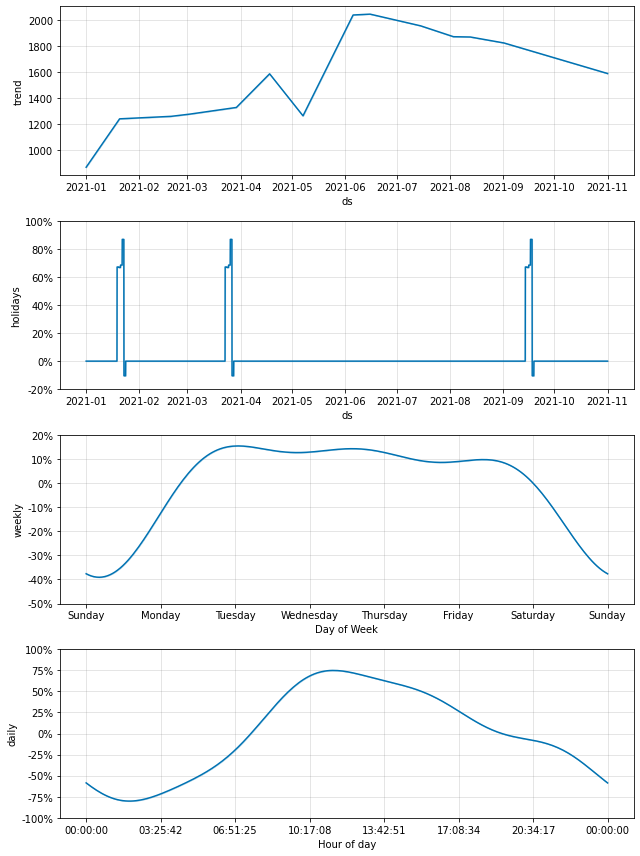

In [50]:
m.plot_components(forecast)

In [51]:
comp = pd.merge(
forecast[['ds','yhat_lower', 'yhat', 'yhat_upper']],
data,
left_on='ds',
right_on='ds')

# Ratio — во сколько раз y дальше чем предсказательный интервал
comp['ratio'] = (comp['yhat']-comp['y'])/(comp['yhat'] - comp['yhat_lower'])
comp['delta'] = comp.yhat-comp.y

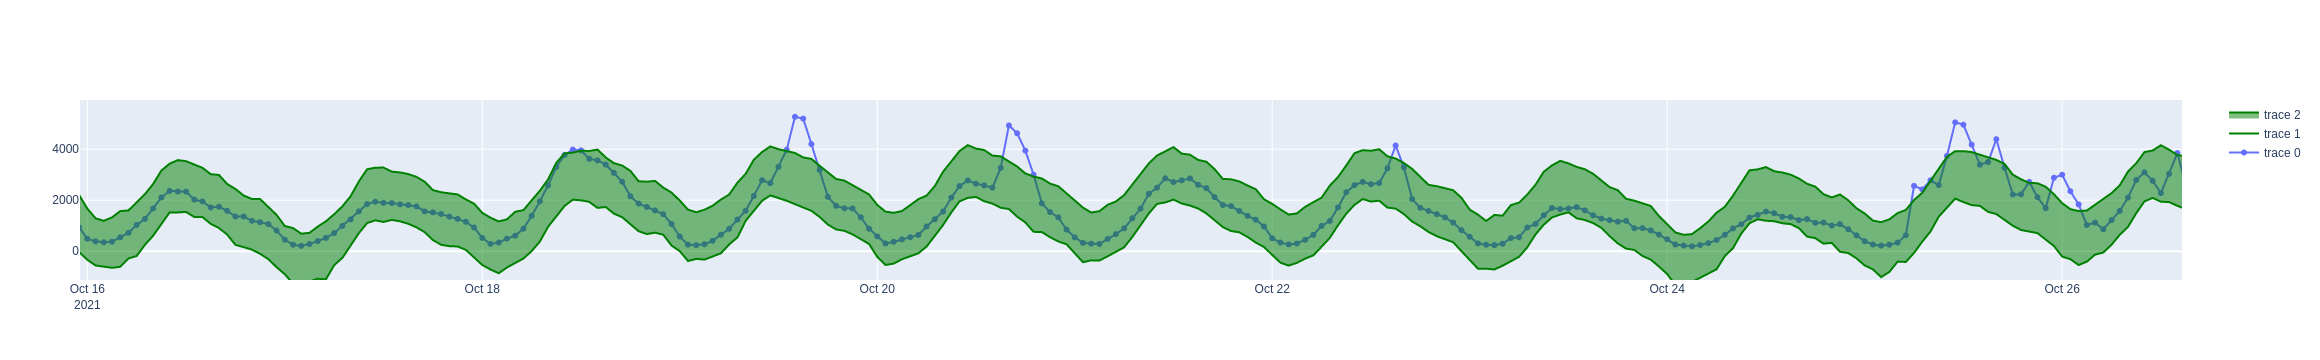

In [52]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(x=comp.ds, y=comp.y,  mode='markers+lines'))
fig.add_trace(go.Scatter(x=comp.ds, y=comp.yhat_lower,  line_color='green'))
fig.add_trace(go.Scatter(x=comp.ds, y=comp.yhat_upper, fill='tonexty',  line_color='green'))

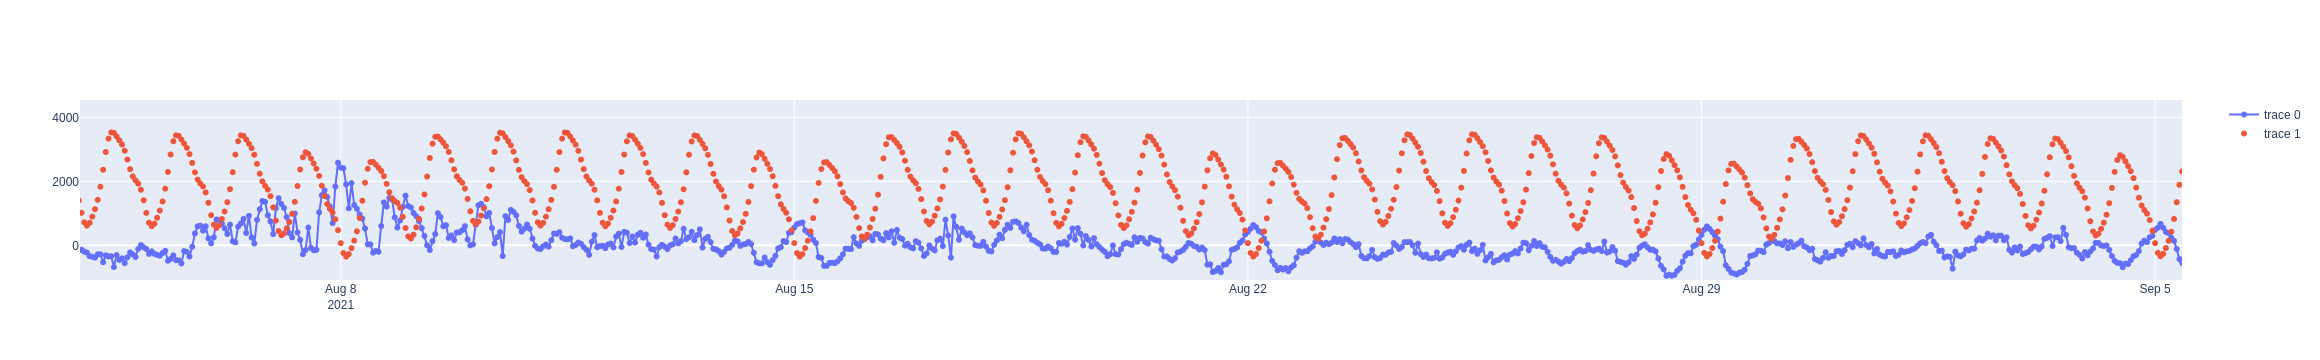

In [138]:
diff = comp.y-comp.yhat
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp.ds, y=diff,  mode='markers+lines'))

# diff = comp.y-comp.yhat
# import plotly.graph_objects as go
# fig = go.Figure()
fig.add_trace(go.Scatter(x=comp.ds, y=comp.yhat,  mode='markers'))

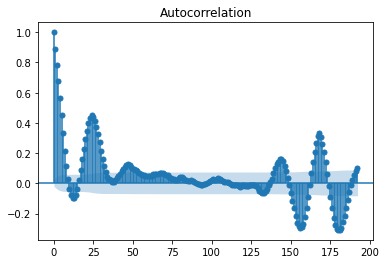

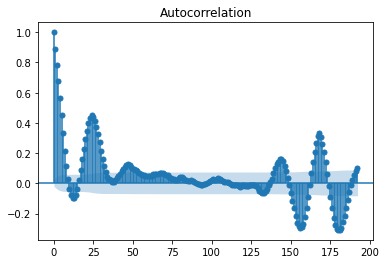

In [58]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(diff,lags=24*8)


In [119]:
from sktime.forecasting.base import ForecastingHorizon
t = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range(df.trx_hour.min(), periods=len(df.trx_hour), freq="H")), is_relative=False
)

ts = pd.DataFrame(index=t)
ts['diff'] = diff.values
ts['y'] = comp.y.values
ts['yhat'] = comp.yhat.values

In [120]:
ts

diff     y         yhat
2021-01-01 00:00 -166.471426   272   438.471426
2021-01-01 01:00    0.469965   301   300.530035
2021-01-01 02:00   18.575462   272   253.424538
2021-01-01 03:00  -82.424719   212   294.424719
2021-01-01 04:00 -174.246041   210   384.246041
...                      ...   ...          ...
2021-10-31 19:00 -149.749471  1101  1250.749471
2021-10-31 20:00 -290.053590   887  1177.053590
2021-10-31 21:00 -298.525873   829  1127.525873
2021-10-31 22:00 -270.801164   731  1001.801164
2021-10-31 23:00 -231.692849   526   757.692849

[7296 rows x 3 columns]

In [71]:

t = TSFreshFeatureExtractor(default_fc_parameters="efficient", show_warnings=False)
Xt = t.fit_transform(ts)
Xt.head()

ValueError: If passed as a pd.DataFrame, X must be a nested pd.DataFrame, with pd.Series or np.arrays inside cells.

In [82]:

transformer = DateTimeFeatures(ts_freq="H",feature_scope='efficient')
y_hat = transformer.fit_transform(ts)

In [96]:
transformer = AutoCorrelationTransformer(n_lags=25)
y_hat = transformer.fit_transform(ts)

In [97]:
y_hat

0     1.000000
1     0.886210
2     0.783156
3     0.677099
4     0.567184
5     0.451135
6     0.330370
7     0.216821
8     0.116703
9     0.027926
10   -0.039129
11   -0.078766
12   -0.096108
13   -0.099521
14   -0.080007
15   -0.038191
16    0.021717
17    0.091532
18    0.158682
19    0.226885
20    0.291517
21    0.349198
22    0.398446
23    0.432068
24    0.449236
25    0.438077
dtype: float64

In [130]:
from sktime.transformations.series.outlier_detection import HampelFilter
transformer = HampelFilter(window_length=48, return_bool=True)
y_hat = transformer.fit_transform(ts['diff'])

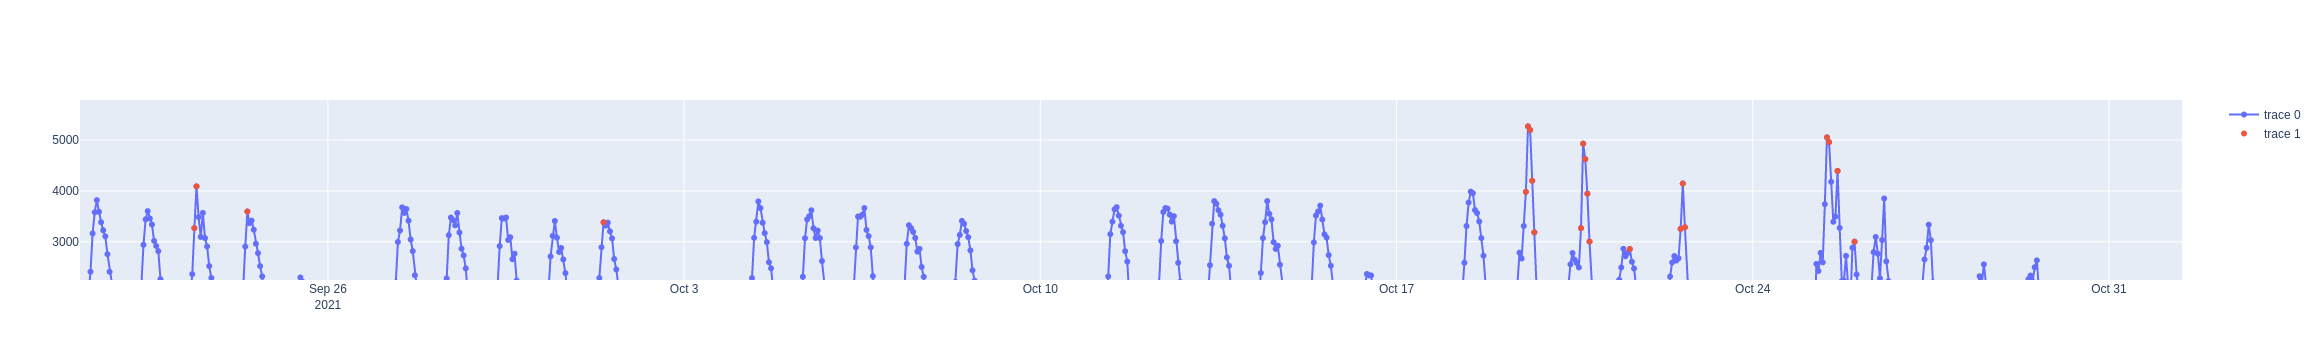

In [137]:
outliers = ts[y_hat]
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=comp.ds, y=ts['y'],  mode='markers+lines'))

# diff = comp.y-comp.yhat
# import plotly.graph_objects as go
# fig = go.Figure()
fig.add_trace(go.Scatter(x=outliers.index.to_timestamp(), y=outliers['y'],  mode='markers'))

In [136]:
y_hat

2021-01-01 00:00    False
2021-01-01 01:00    False
2021-01-01 02:00    False
2021-01-01 03:00    False
2021-01-01 04:00    False
                    ...  
2021-10-31 19:00    False
2021-10-31 20:00    False
2021-10-31 21:00    False
2021-10-31 22:00    False
2021-10-31 23:00    False
Freq: H, Name: diff, Length: 7296, dtype: bool

In [146]:
ts['day'] = ts.index.strftime("%Y-%m-%d")

In [149]:
diff_daily = ts.groupby('day')['diff'].agg(sum)

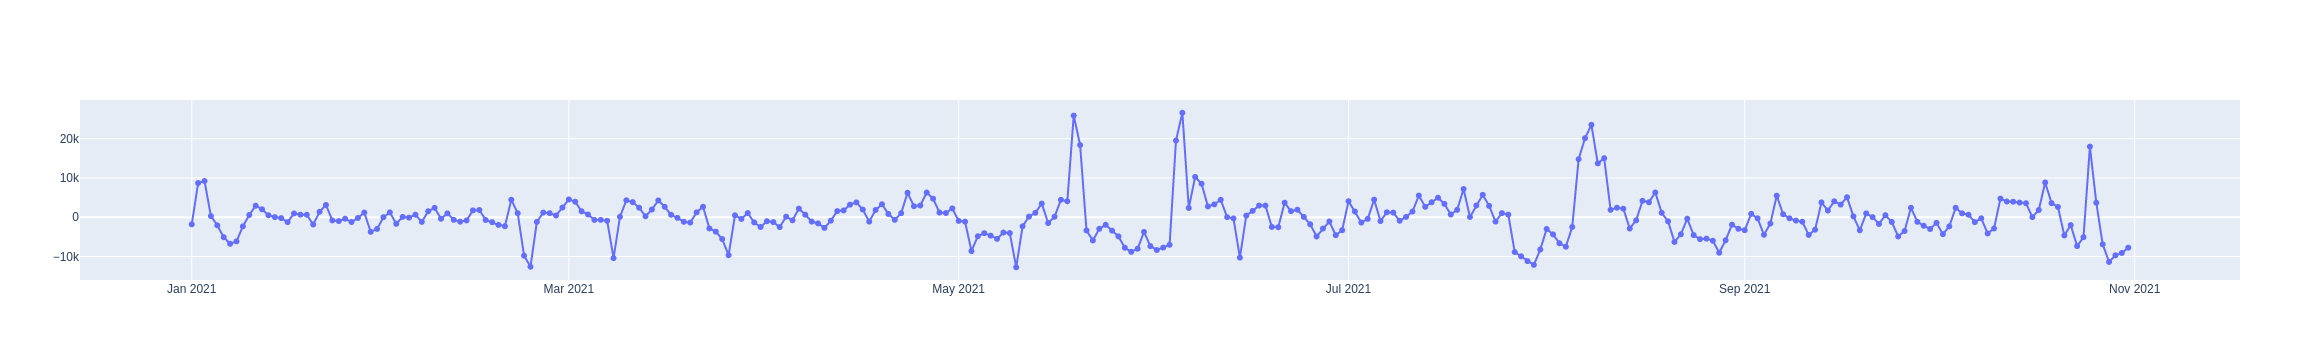

In [151]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=diff_daily.index, y=diff_daily,  mode='markers+lines'))

In [231]:


class Saver:
    pass

class CustomEstimator(BaseEstimator, RegressorMixin):
    def __init__(self, demo_param='demo'):
        self.demo_param = demo_param

    def fit(self, X, y):
        print('foo')
        Saver.X = X
        Saver.y = y
#         # Check that X and y have correct shape
#         X, y = check_X_y(X, y)
#         # Store the classes seen during fit
#         self.classes_ = unique_labels(y)

#         self.X_ = X
#         self.y_ = y
#         # Return the classifier
        return self

    def predict(self, X):

        # Check is fit had been called
        check_is_fitted(self)

        # Input validation
        X = check_array(X)

        closest = np.argmin(euclidean_distances(X, self.X_), axis=1)
        return self.y_[closest]

fh = ForecastingHorizon(ts.index, is_relative=False)
estimator = CustomEstimator()
forecaster = RecursiveTabularRegressionForecaster(estimator)
y_hat = forecaster.fit(ts['diff'], fh=fh)

foo


In [232]:
from sktime.forecasting.model_selection import temporal_train_test_split
y=ts['y']
y_train, y_test = temporal_train_test_split(y, test_size=24*7)
fh = ForecastingHorizon(y_test.index, is_relative=False)


In [233]:
y

2021-01-01 00:00     272
2021-01-01 01:00     301
2021-01-01 02:00     272
2021-01-01 03:00     212
2021-01-01 04:00     210
                    ... 
2021-10-31 19:00    1101
2021-10-31 20:00     887
2021-10-31 21:00     829
2021-10-31 22:00     731
2021-10-31 23:00     526
Freq: H, Name: y, Length: 7296, dtype: int64

In [247]:
from sktime.forecasting.base._fh import ForecastingHorizon
from sktime.transformations.base import _SeriesToSeriesTransformer
from sktime.utils.validation.series import check_series
from sktime.forecasting.trend import PolynomialTrendForecaster
from sklearn.linear_model import LinearRegression
class Deholiday(_SeriesToSeriesTransformer):
    _required_parameters = ["holidays"]
    _tags = {"transform-returns-same-time-index": True}
    def __init__(self, holidays=None):
        self.holidays = holidays
        self.regressor=None
        super(Deholiday, self).__init__()

    def fit(self, Z, X=None):
        """Compute the trend in the series.
        Parameters
        ----------
        Y : pd.Series
            Endogenous time series to fit a trend to.
        X : pd.DataFrame, optional (default=None)
            Exogenous variables.
        Returns
        -------
        self : an instance of self
        """
        self._is_fitted = False
        z = check_series(Z)
        if self.regressor is None:
            self.regressor = LinearRegression()

            
        # multivariate
        if isinstance(z, pd.DataFrame):
            self.forecaster_ = {}
            for colname in z.columns:
                forecaster = clone(self.forecaster)
                self.forecaster_[colname] = forecaster.fit(z[colname], X)
        # univariate
        else:
            forecaster = clone(self.forecaster)
            self.forecaster_ = forecaster.fit(z, X)
        self._is_fitted = True
        return self

    def transform(self, Z, X=None):
        """Remove trend from the data.
        Parameters
        ----------
        y : pd.Series
            Time series to be detrended.
        X : pd.DataFrame, optional (default=False)
            Exogenous variables.
        Returns
        -------
        y_hat : pd.Series
            De-trended series.
        """
        self.check_is_fitted()
        z = check_series(Z)
        fh = ForecastingHorizon(z.index, is_relative=False)

        # multivariate
        if isinstance(z, pd.DataFrame):
            z = z.copy()
            # check if all columns are known
            Z_fit_keys = set(self.forecaster_.keys())
            Z_new_keys = set(z.columns)
            difference = Z_new_keys.difference(Z_fit_keys)
            if len(difference) != 0:
                raise ValueError(
                    "Z contains columns that have not been "
                    "seen in fit: " + str(difference)
                )
            for colname in z.columns:
                z_pred = self.forecaster_[colname].predict(fh, X)
                z[colname] = z[colname] - z_pred
            return z
        # univariate
        else:
            z_pred = self.forecaster_.predict(fh, X)
            return z - z_pred

    def inverse_transform(self, Z, X=None):
        """Add trend back to a time series.
        Parameters
        ----------
        y : pd.Series, list
            Detrended time series to revert.
        X : pd.DataFrame, optional (default=False)
            Exogenous variables.
        Returns
        -------
        y_hat : pd.Series
            Series with the trend.
        """
        self.check_is_fitted()
        z = check_series(Z)
        fh = ForecastingHorizon(z.index, is_relative=False)

        # multivariate
        if isinstance(z, pd.DataFrame):
            z = z.copy()
            # check if all columns are known
            Z_fit_keys = set(self.forecaster_.keys())
            Z_new_keys = set(z.columns)
            difference = Z_new_keys.difference(Z_fit_keys)
            if len(difference) != 0:
                raise ValueError(
                    "Z contains columns that have not been "
                    "seen in fit: " + difference
                )
            for colname in z.columns:
                z_pred = self.forecaster_[colname].predict(fh, X)
                z[colname] = z[colname] + z_pred
            return z
        # univariate
        else:
            z_pred = self.forecaster_.predict(fh, X)
            return z + z_pred

    def update(self, Z, X=None, update_params=True):
        """Update the parameters of the detrending estimator with new data.
        Parameters
        ----------
        y_new : pd.Series
            New time series.
        update_params : bool, optional (default=True)
            Update the parameters of the detrender model.
        Returns
        -------
        self : an instance of self
        """
        z = check_series(Z, allow_empty=True)
        # multivariate
        if isinstance(z, pd.DataFrame):
            # check if all columns are known
            Z_fit_keys = set(self.forecaster_.keys())
            Z_new_keys = set(z.columns)
            difference = Z_new_keys.difference(Z_fit_keys)
            if len(difference) != 0:
                raise ValueError(
                    "Z contains columns that have not been "
                    "seen in fit: " + str(difference)
                )
            for colname in z.columns:
                self.forecaster_[colname].update(
                    z[colname], X, update_params=update_params
                )
        # univariate
        else:
            self.forecaster_.update(z, X, update_params=update_params)
        return self


In [298]:
from sktime.transformations.base import _PanelToTabularTransformer

class HolidayFeatureExtractor(_SeriesToSeriesTransformer):
    _tags = {
        "fit-in-transform": True,
        "enforce_index_type": [pd.DatetimeIndex, pd.PeriodIndex],
        "skip-inverse-transform": True,
        "univariate-only": False,
    }

    def __init__(self, holidays):
        self.holidays = holidays
        holiday_dict={}
        for i,row in holidays.iterrows():
            d = row.ds
            begin=row.lower_window
            end=row.upper_window
            for i in range(begin,end):
                dt = d+datetime.timedelta(days=i)
                holiday_dict[dt]=i
        self.holiday_dict=holiday_dict
        super(HolidayFeatureExtractor, self).__init__()

    def transform(self, Z, X=None):
        """Transform data.
        Returns a transformed version of Z.
        Parameters
        ----------
        Z : pd.Series, pd.DataFrame
        Returns
        -------
        Z : pd.Series, pd.DataFrame
            Transformed time series(es).
        """
        self.check_is_fitted()
#         Z = check_series(Z)
        Z = Z.copy()

        x_df = pd.DataFrame(index=Z.index)
        if isinstance(x_df.index, pd.PeriodIndex):
            x_df["date_sequence"] = Z.index.to_timestamp().astype("datetime64[ns]")
        elif isinstance(x_df.index, pd.DatetimeIndex):
            x_df["date_sequence"] = Z.index
        elif not isinstance(x_df.index, pd.DatetimeIndex):
            raise ValueError("Index type not supported")
#         x_df['date'] = x_df['date_sequence'].dt.date
#         Saver.x_df = x_df
        holiday_column =  x_df.date_sequence.dt.date.apply(lambda x: holiday_dict.get(x, -1)).rename('holiday_index')
#         df = [_calendar_dummies(x_df, dummy) for dummy in calendar_dummies]
#         df = pd.concat(df, axis=1)

        Z = pd.concat([Z, holiday_column], axis=1)

        return Z


In [324]:
y

2021-01-01 00:00     272
2021-01-01 01:00     301
2021-01-01 02:00     272
2021-01-01 03:00     212
2021-01-01 04:00     210
                    ... 
2021-10-31 19:00    1101
2021-10-31 20:00     887
2021-10-31 21:00     829
2021-10-31 22:00     731
2021-10-31 23:00     526
Freq: H, Name: y, Length: 7296, dtype: int64

In [634]:
y=ts['y']
y = y['2021-04-01':'2021-09-01']
X = pd.DataFrame(index=y.index)
X = X['2021-04-01':'2021-09-01']

deholiday=HolidayFeatureExtractor(sales)
f = deholiday.fit_transform(y)
X['holiday_index'] = f['holiday_index']

datetime_features = DateTimeFeatures(feature_scope='minimal')
f=datetime_features.fit_transform(y)
X['weekday']=f['weekday']
X['hour']=f['hour']


# des = Deseasonalizer(sp=24, model='multiplicative')
# des.fit(y)
# s = des.seasonal_
# s = datetime_features.fit_transform(s)
# s = s[['seasonal','hour']].rename(columns={'seasonal':'hourly_coef'})

# X = X.join(s.set_index('hour'),on='hour')

# datetime_features = DateTimeFeatures(feature_scope= "efficient")
# w = datetime_features.fit_transform(y)#.groupby(['year','month','weekday'])['y'].agg('sum')
# w = w.loc[:,~w.columns.duplicated()]
# weekly = pd.DataFrame(w.groupby(['year','month','day'])['y'].agg('sum'))
# weekly['weekday'] = w.groupby(['year','month','day'])['weekday'].agg('mean').astype(int)
# des = Deseasonalizer(sp=7, model='multiplicative')
# des.fit(weekly.reset_index().y)
# s = pd.DataFrame(des.seasonal_.rename('weekly_coef'))
# s['weekday']=weekly.iloc[:7].weekday.values
# s=s.set_index('weekday')

# X = X.join(s,on='weekday')

In [635]:
X

holiday_index  weekday  hour
2021-04-01 00:00             -1        3     0
2021-04-01 01:00             -1        3     1
2021-04-01 02:00             -1        3     2
2021-04-01 03:00             -1        3     3
2021-04-01 04:00             -1        3     4
...                         ...      ...   ...
2021-09-01 19:00             -1        2    19
2021-09-01 20:00             -1        2    20
2021-09-01 21:00             -1        2    21
2021-09-01 22:00             -1        2    22
2021-09-01 23:00             -1        2    23

[3696 rows x 3 columns]

In [690]:
log1past = pd.DataFrame(y)
log1past['y'] = np.log(log1past.y+1)
log1past['ds'] = past.index.to_timestamp()
log1past

y                  ds
2021-04-01 00:00  6.329721 2021-04-01 00:00:00
2021-04-01 01:00  5.641907 2021-04-01 01:00:00
2021-04-01 02:00  5.525453 2021-04-01 02:00:00
2021-04-01 03:00  5.673323 2021-04-01 03:00:00
2021-04-01 04:00  6.192362 2021-04-01 04:00:00
...                    ...                 ...
2021-09-01 19:00  7.470794 2021-09-01 19:00:00
2021-09-01 20:00  7.387709 2021-09-01 20:00:00
2021-09-01 21:00  7.049255 2021-09-01 21:00:00
2021-09-01 22:00  7.313220 2021-09-01 22:00:00
2021-09-01 23:00  6.965080 2021-09-01 23:00:00

[3696 rows x 2 columns]

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


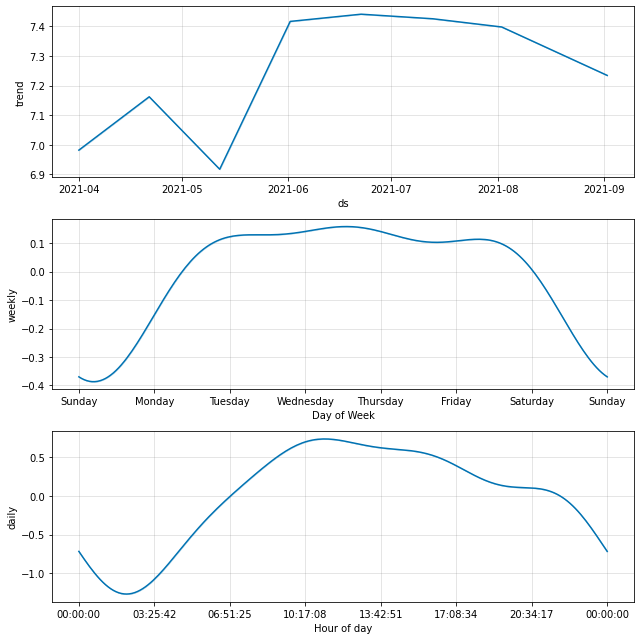

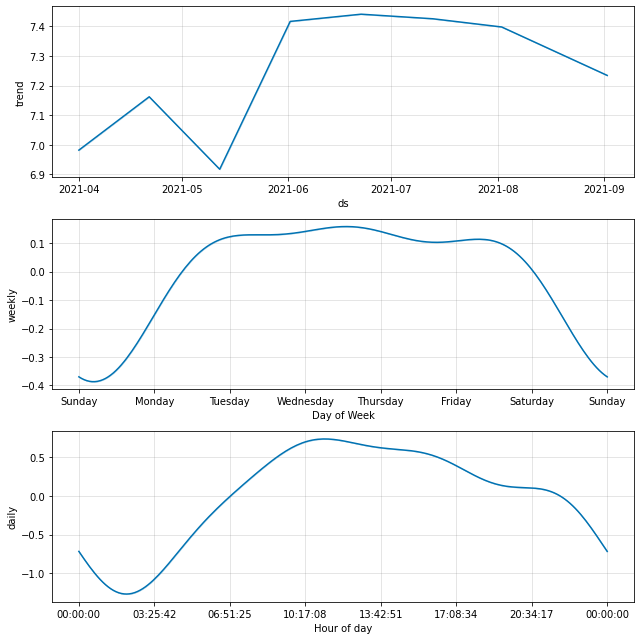

In [700]:

m = Prophet(
    weekly_seasonality = True,
    daily_seasonality = True,
#     yearly_seasonality = True,
    n_changepoints = 6,
    interval_width=0.99,
#     mcmc_samples = 300,
    seasonality_mode='additive',
 
)

m.fit(log1past)


forecast = m.predict(log1past)

m.plot_components(forecast)

In [701]:
forecast


ds     trend  yhat_lower  yhat_upper  trend_lower  \
0    2021-04-01 00:00:00  6.981748    5.845925    6.992759     6.981748   
1    2021-04-01 01:00:00  6.982115    5.464198    6.592323     6.982115   
2    2021-04-01 02:00:00  6.982481    5.270982    6.374044     6.982481   
3    2021-04-01 03:00:00  6.982847    5.320017    6.506162     6.982847   
4    2021-04-01 04:00:00  6.983214    5.639506    6.788972     6.983214   
...                  ...       ...         ...         ...          ...   
3691 2021-09-01 19:00:00  7.235178    6.976019    8.097517     7.235178   
3692 2021-09-01 20:00:00  7.234957    6.948387    8.047623     7.234957   
3693 2021-09-01 21:00:00  7.234735    6.923733    8.081731     7.234735   
3694 2021-09-01 22:00:00  7.234513    6.763946    7.881209     7.234513   
3695 2021-09-01 23:00:00  7.234292    6.466041    7.672790     7.234292   

      trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0        6.981748       -0.575028             -0.575028             -0.575028   
1        6.982115       -0.949552             -0.949552             -0.949552   
2        6.982481       -1.126896             -1.126896             -1.126896   
3        6.982847       -1.044891             -1.044891             -1.044891   
4        6.983214       -0.770376             -0.770376             -0.770376   
...           ...             ...                   ...                   ...   
3691     7.235178        0.300335              0.300335              0.300335   
3692     7.234957        0.259134              0.259134              0.259134   
3693     7.234735        0.236387              0.236387              0.236387   
3694     7.234513        0.119147              0.119147              0.119147   
3695     7.234292       -0.166828             -0.166828             -0.166828   

         daily  daily_lower  daily_upper    weekly  weekly_lower  \
0    -0.716277    -0.716277    -0.716277  0.141248      0.141248   
1    -1.087860    -1.087860    -1.087860  0.138308      0.138308   
2    -1.262168    -1.262168    -1.262168  0.135272      0.135272   
3    -1.177069    -1.177069    -1.177069  0.132178      0.132178   
4    -0.899445    -0.899445    -0.899445  0.129068      0.129068   
...        ...          ...          ...       ...           ...   
3691  0.147047     0.147047     0.147047  0.153288      0.153288   
3692  0.107797     0.107797     0.107797  0.151336      0.151336   
3693  0.087258     0.087258     0.087258  0.149129      0.149129   
3694 -0.027546    -0.027546    -0.027546  0.146693      0.146693   
3695 -0.310883    -0.310883    -0.310883  0.144055      0.144055   

      weekly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         0.141248                   0.0                         0.0   
1         0.138308                   0.0                         0.0   
2         0.135272                   0.0                         0.0   
3         0.132178                   0.0                         0.0   
4         0.129068                   0.0                         0.0   
...            ...                   ...                         ...   
3691      0.153288                   0.0                         0.0   
3692      0.151336                   0.0                         0.0   
3693      0.149129                   0.0                         0.0   
3694      0.146693                   0.0                         0.0   
3695      0.144055                   0.0                         0.0   

      multiplicative_terms_upper      yhat  
0                            0.0  6.406720  
1                            0.0  6.032563  
2                            0.0  5.855585  
3                            0.0  5.937957  
4                            0.0  6.212838  
...                          ...       ...  
3691                         0.0  7.535514  
3692                         0.0  7.494090  
3693                         0.0  7.471122  
3694            

In [702]:
forecast.daily + forecast.weekly

0      -0.575028
1      -0.949552
2      -1.126896
3      -1.044891
4      -0.770376
          ...   
3691    0.300335
3692    0.259134
3693    0.236387
3694    0.119147
3695   -0.166828
Length: 3696, dtype: float64

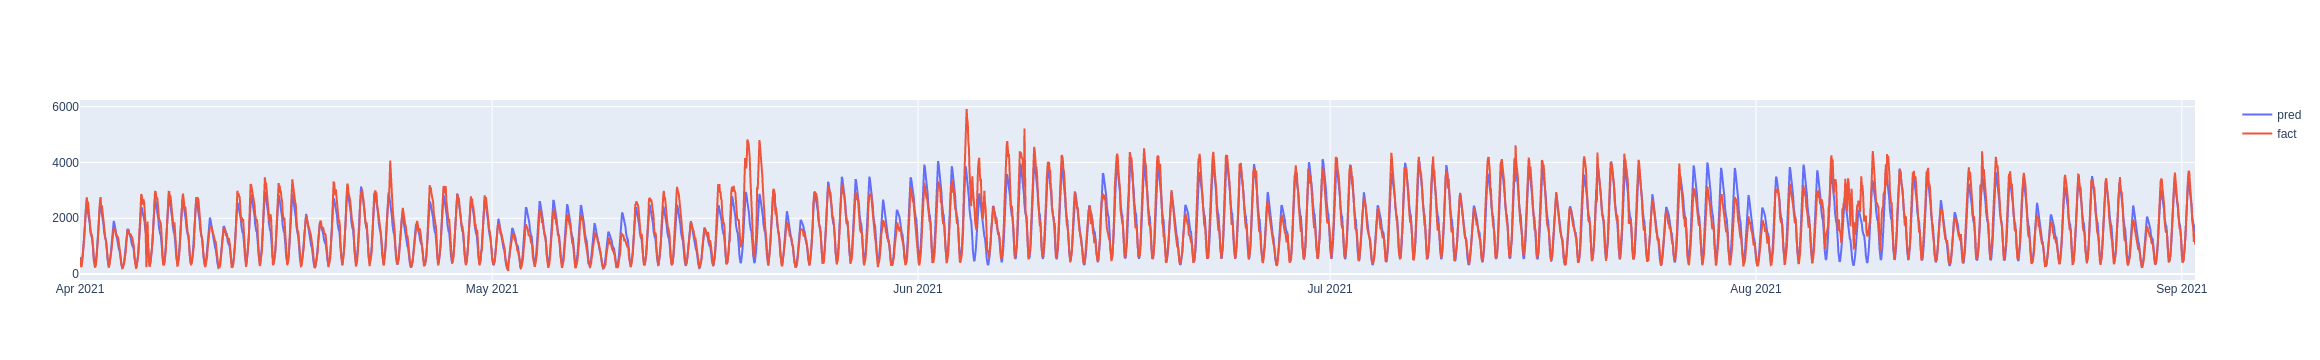

In [704]:
figure = go.Figure()
y_pred = np.exp(forecast.yhat)-1
figure.add_trace(go.Scatter(x=forecast.ds, y=y_pred, name='pred'))
figure.add_trace(go.Scatter(x=forecast.ds, y=past.y, name='fact'))
# figure.add_trace(go.Scatter(x=forecast.ds, y=forecast.trend*(1+forecast.multiplicative_terms), name='pred'))


In [661]:
past

ds     y
0    2021-01-01 00:00:00   272
1    2021-01-01 01:00:00   301
2    2021-01-01 02:00:00   272
3    2021-01-01 03:00:00   212
4    2021-01-01 04:00:00   210
...                  ...   ...
7291 2021-10-31 19:00:00  1101
7292 2021-10-31 20:00:00   887
7293 2021-10-31 21:00:00   829
7294 2021-10-31 22:00:00   731
7295 2021-10-31 23:00:00   526

[7296 rows x 2 columns]

In [641]:
def plot_series_plotly(y):
    y1 = pd.Series(index = y.index.to_timestamp(), data=y.values)
    fig = px.line(y1)
    return fig

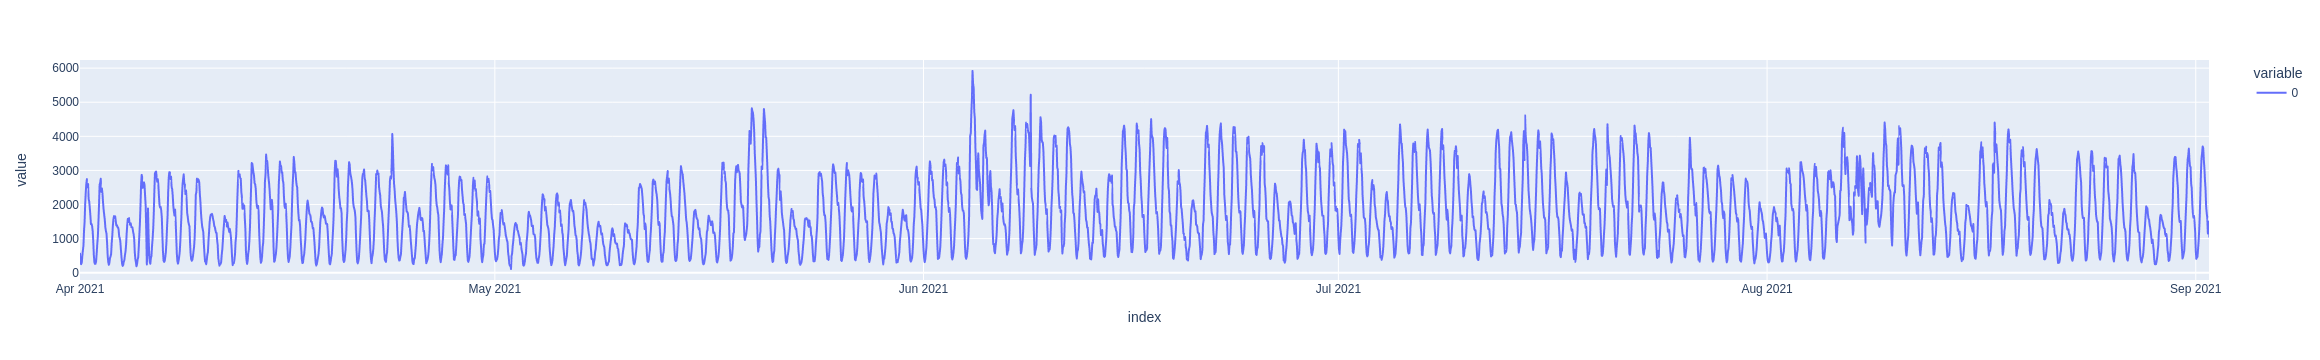

In [642]:
plot_series_plotly(y)

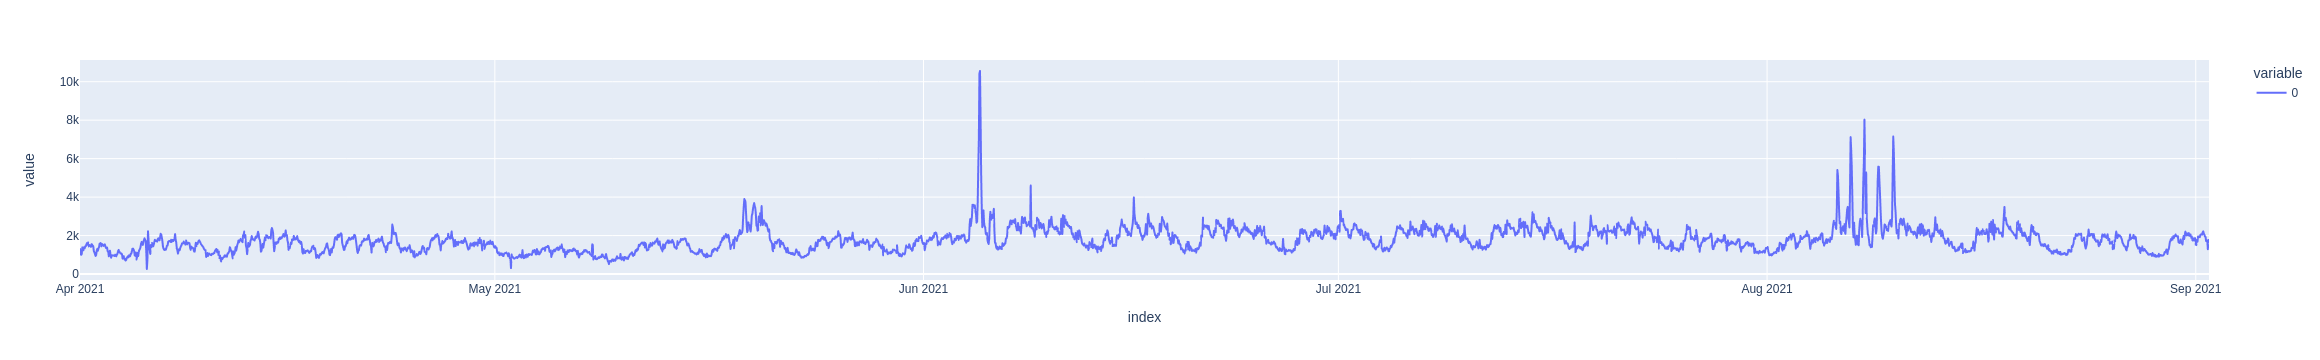

In [655]:
des = Deseasonalizer(sp=24, model='multiplicative')
y_des = des.fit_transform(y)
plot_series_plotly(y_des)

In [652]:
det = Detrender(forecaster=PolynomialTrendForecaster(degree=1))
y_des_det = det.fit_transform(y_des)

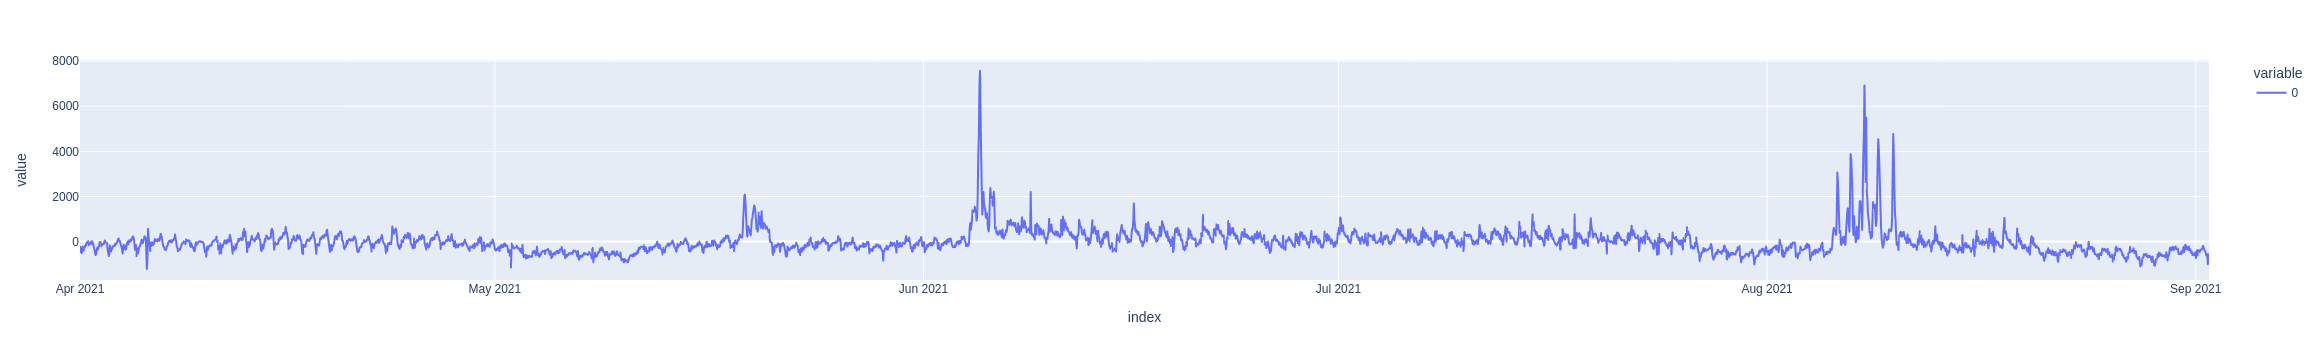

In [653]:
plot_series_plotly(y_des_det)

In [517]:
lambdas = pd.Series(index=X.index,data=1600)
t = des.inverse_transform(lambdas)
# plot_series(t[:24*7])
# plot_series(y[:24*7])
from scipy.stats import poisson

def loss(k, mu):
    p = poisson.pmf(k,mu)
    p1 = (-mu + k/mu) * p
    p2 = (-1 - k/mu**2)*p + (-mu + k/mu)*p1
    
    grad = -p1/p
    hess = (p1**2 - p*p2) /p**2
    return grad, hess

# loss = -np.sum(poisson.logpmf(y,t))
# loss
# loss(y,t)

In [500]:
X

holiday_index  weekday  hour
2021-01-01 00:00             -1        4     0
2021-01-01 01:00             -1        4     1
2021-01-01 02:00             -1        4     2
2021-01-01 03:00             -1        4     3
2021-01-01 04:00             -1        4     4
...                         ...      ...   ...
2021-10-31 19:00             -1        6    19
2021-10-31 20:00             -1        6    20
2021-10-31 21:00             -1        6    21
2021-10-31 22:00             -1        6    22
2021-10-31 23:00             -1        6    23

[7296 rows x 3 columns]

In [503]:
X_train, X_valid = temporal_train_test_split(X, test_size=24*7)
y_train, y_valid = temporal_train_test_split(y, test_size=24*7)

In [592]:
import lightgbm as lgb
lgb_train = lgb.Dataset(X_train, y_train, free_raw_data=False)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train, free_raw_data=False)

def objective_train(y_pred, ds):
    t = des.inverse_transform(y_pred)
    t = np.where(t<1e-2, 1e-2,t)
    grad,hess = loss(ds.label, t)
    return grad, hess

def objective_eval(y_pred, ds):
    t = des.inverse_transform(y_pred)
    t = np.where(t<1e-2, 1e-2,t)
    loss = -np.sum(poisson.logpmf(ds.label,t))
    return "mlp poisson loss", loss, False

def objective_mse_train(y_pred, ds):
    ts = pd.Series(index=ds.data.index, data=y_pred)
    t = des.inverse_transform(ts)
    grad = 2*(t-ds.label)
    hess = t*0+2
    
    return des.transform(grad), des.transform(hess)

def objective_mse_eval(y_pred, ds):
    ts = pd.Series(index=ds.data.index, data=y_pred)
    t = des.inverse_transform(ts)
    loss = np.sum((t-ds.label)**2)
    return "mse loss", loss, False

# specify your configurations as a dict
params = {
    'objective': 'regression',
    'verbose': 0
}

In [593]:
gbm_l2 = lgb.train(params,
                lgb_train,
                num_boost_round=100,
               fobj=objective_mse_train,
                feval=objective_mse_eval,
                valid_sets=lgb_eval)

[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Using self-defined objective function
[1]	valid_0's mse loss: 3.88593e+08
[2]	valid_0's mse loss: 2.90404e+08
[3]	valid_0's mse loss: 2.2236e+08
[4]	valid_0's mse loss: 1.75045e+08
[5]	valid_0's mse loss: 1.41843e+08
[6]	valid_0's mse loss: 1.18538e+08
[7]	valid_0's mse loss: 1.02017e+08
[8]	valid_0's mse loss: 9.01384e+07
[9]	valid_0's mse loss: 8.19043e+07
[10]	valid_0's mse loss: 7.61121e+07
[11]	valid_0's mse loss: 7.20143e+07
[12]	valid_0's mse loss: 6.9104e+07
[13]	valid_0's mse loss: 6.71041e+07
[14]	valid_0's mse loss: 6.56945e+07
[15]	valid_0's mse loss: 6.47375e+07
[16]	valid_0's mse loss: 6.40692e+07
[17]	valid_0's mse loss: 6.36238e+07
[18]	valid_0's mse loss: 6.32111e+0

<AxesSubplot:>

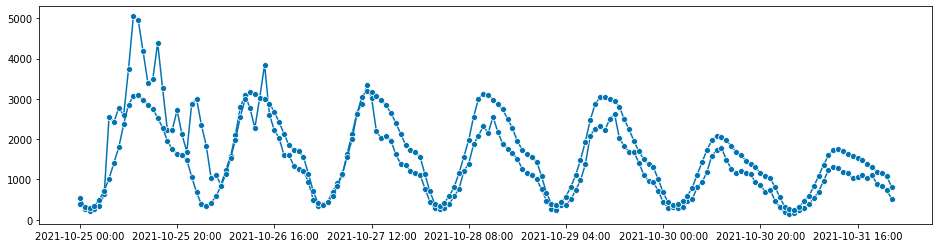

In [606]:
y_pred = gbm_l2.predict(X_valid)
ts_pred = pd.Series(index=X_valid.index, data=y_pred)
pred = des.inverse_transform(ts_pred)
fig,ax = plot_series(y_valid)
plot_series(pred,ax=ax)

<AxesSubplot:>

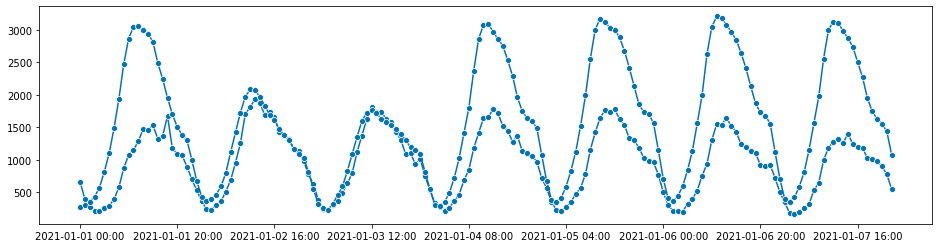

In [608]:
y_pred = gbm_l2.predict(X_train)
ts_pred = pd.Series(index=X_train.index, data=y_pred)
pred = des.inverse_transform(ts_pred)
fig,ax = plot_series(y_train[:24*7])
plot_series(pred[:24*7],ax=ax)

In [575]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10,
                init_model=gbm_l2,
                fobj=objective_train,
                feval=objective_eval,
                valid_sets=lgb_eval)
                
y_pred = gbm.predict(X_valid)

[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000717 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Using self-defined objective function
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[101]	valid_0's mlp poisson loss: 20190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[102]	valid_0's mlp poisson loss: 20190
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[103]	valid_0's mlp poisson loss: 20190
[LightGBM] [Warning] No further splits with positive gain, b

<ipython-input-517-cf270bf0a746>:12: RuntimeWarning:

invalid value encountered in true_divide

<ipython-input-517-cf270bf0a746>:13: RuntimeWarning:

divide by zero encountered in true_divide

<ipython-input-517-cf270bf0a746>:13: RuntimeWarning:

invalid value encountered in true_divide



In [576]:
y_pred

array([ 569.05856197,  355.69602958,  344.46961271,  391.52945037,
        516.34698466,  733.4329572 , 1027.89893601, 1415.69466443,
       1806.27961321, 2377.44630263, 2851.85984307, 3055.8406121 ,
       3073.77344456, 2966.81010237, 2862.60411348, 2761.78541472,
       2513.37447423, 2290.36425105, 1969.38054417, 1757.73686483,
       1640.27861886, 1599.53351746, 1492.82631961, 1069.09726598,
        665.8492359 ,  401.84161935,  376.6432795 ,  444.47578369,
        589.24073898,  824.7403466 , 1122.33231605, 1520.37995411,
       1969.35501592, 2542.0781504 , 2978.17802132, 3171.63045501,
       3140.07348642, 3041.44725728, 2974.63811258, 2886.85067723,
       2688.49249735, 2423.91349332, 2146.48769463, 1858.61980372,
       1737.64810606, 1698.46938628, 1570.47532022, 1144.62142116,
        724.32634599,  437.75500789,  393.4291554 ,  467.18932829,
        603.08763701,  836.93708453, 1150.03451696, 1557.78849228,
       2003.20336327, 2615.24354577, 3055.28232329, 3186.91771

In [539]:
Saver.ds.label

array([ 394.,  265.,  222.,  257.,  340.,  629., 2563., 2424., 2780.,
       2593., 3738., 5053., 4959., 4178., 3392., 3495., 4393., 3272.,
       2226., 2232., 2721., 2118., 1687., 2881., 3000., 2355., 1836.,
       1030., 1123.,  864., 1223., 1581., 2104., 2794., 3093., 2763.,
       2280., 3032., 3850., 2611., 2223., 2023., 1606., 1606., 1340.,
       1248., 1213.,  943.,  502.,  340.,  398.,  447.,  701.,  912.,
       1121., 1643., 2132., 2650., 2880., 3335., 3030., 2202., 2019.,
       2078., 1965., 1623., 1386., 1351., 1219., 1153., 1112.,  775.,
        452.,  283.,  264.,  297.,  394.,  587.,  766., 1209., 1393.,
       1872., 2087., 2321., 2152., 2554., 2179., 1883., 1767., 1650.,
       1520., 1259., 1170., 1100., 1000.,  755.,  468.,  270.,  236.,
        357.,  376.,  503.,  735.,  977., 1375., 2090., 2261., 2334.,
       2217., 2497., 2633., 2023., 1826., 1694., 1679., 1419., 1123.,
        966.,  937.,  713.,  446.,  292.,  312.,  288.,  318.,  470.,
        511.,  802.,

In [546]:
Saver.y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [547]:
Saver.ds.label

array([ 394.,  265.,  222.,  257.,  340.,  629., 2563., 2424., 2780.,
       2593., 3738., 5053., 4959., 4178., 3392., 3495., 4393., 3272.,
       2226., 2232., 2721., 2118., 1687., 2881., 3000., 2355., 1836.,
       1030., 1123.,  864., 1223., 1581., 2104., 2794., 3093., 2763.,
       2280., 3032., 3850., 2611., 2223., 2023., 1606., 1606., 1340.,
       1248., 1213.,  943.,  502.,  340.,  398.,  447.,  701.,  912.,
       1121., 1643., 2132., 2650., 2880., 3335., 3030., 2202., 2019.,
       2078., 1965., 1623., 1386., 1351., 1219., 1153., 1112.,  775.,
        452.,  283.,  264.,  297.,  394.,  587.,  766., 1209., 1393.,
       1872., 2087., 2321., 2152., 2554., 2179., 1883., 1767., 1650.,
       1520., 1259., 1170., 1100., 1000.,  755.,  468.,  270.,  236.,
        357.,  376.,  503.,  735.,  977., 1375., 2090., 2261., 2334.,
       2217., 2497., 2633., 2023., 1826., 1694., 1679., 1419., 1123.,
        966.,  937.,  713.,  446.,  292.,  312.,  288.,  318.,  470.,
        511.,  802.,

In [554]:
loss(Saver.y_pred, Saver.ds.label)

<ipython-input-517-cf270bf0a746>:12: RuntimeWarning:

invalid value encountered in true_divide

<ipython-input-517-cf270bf0a746>:13: RuntimeWarning:

invalid value encountered in true_divide



(array([394., 265., 222., 257., 340., 629.,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan, 502., 340., 398., 447., 701.,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan, 452., 283., 264., 297., 394.,
        587.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 468., 270., 236.,
        357., 376., 503., 735.,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 713., 446.,
        292., 312., 288., 318., 470., 511.,  nan,  nan,  nan,  nan,  nan,
         nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, 698.,  nan,
        478., 318., 196., 145., 166., 

In [577]:
loss(np.array([ 394.,  265.,  222.,  257.]),
     np.array([ 569.05856197,  355.69602958,  344.46961271,  391.52945037]))

(array([568.36619035, 354.95101142, 343.82514367, 390.87305019]),
 array([1.0012167 , 1.00209454, 1.0018709 , 1.0016765 ]))

In [578]:
loss(np.array([ 394.]),
     np.array([569]))

(array([568.30755712]), array([1.00121695]))

In [565]:
k=10
mu=100
p = poisson.pmf(k,mu)
p

1.0251532120868872e-30

In [558]:
p1 = (-mu + k/mu) * p
p2 = (-1 - k/mu**2)*p + (-mu + k/mu)*p1

grad = -p1/p
hess = (p1**2 - p*p2) /p**2

<ipython-input-558-5941fdfb132d>:7: RuntimeWarning:

invalid value encountered in double_scalars

<ipython-input-558-5941fdfb132d>:8: RuntimeWarning:

invalid value encountered in double_scalars



In [559]:
p

0.0

In [463]:
forecaster = PolynomialTrendForecaster(degree=3)
forecaster.fit(y)



PolynomialTrendForecaster(degree=3)

In [465]:
forecaster.regressor_.

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [369]:
h = datetime_features.fit_transform(y).groupby('hour')['y'].agg('sum')
h = h/h.max()

In [370]:
h

hour
0     0.237688
1     0.149376
2     0.135497
3     0.151859
4     0.195030
5     0.265785
6     0.362197
7     0.492378
8     0.627249
9     0.805971
10    0.942820
11    1.000000
12    0.996146
13    0.964127
14    0.930921
15    0.891460
16    0.827229
17    0.756373
18    0.670649
19    0.598006
20    0.549434
21    0.525522
22    0.488550
23    0.364741
Name: y, dtype: float64

In [375]:
s['hourly_coef']/h.values



In [308]:
pipeline = ForecastingPipeline(
    [
#         ('deseason', ConditionalDeseasonalizer(sp=24)),
#         ('deseason2', ConditionalDeseasonalizer(sp=24*7)),

        #         ("deseasonalize_daily", Deseasonalizer(model='multiplicative',sp=24)),
#         ("deseasonalize_weekly", Deseasonalizer(model='multiplicative', sp=24*7)),
#         ('detrender', Detrender(forecaster=PolynomialTrendForecaster(degree=1)) ),
        ('holiday_extractor', HolidayFeatureExtractor(sales)),
#         ('datetime', DateTimeFeatures()),
        
        ("forecast", forecaster),
    ]
)
pipeline.fit(y_train, fh=fh)

foo


ForecastingPipeline(steps=[('holiday_extractor',
                            HolidayFeatureExtractor(holidays=  holiday         ds  lower_window  upper_window
0    sale 2021-09-14             0             4
1    sale 2020-06-23             0             4
2    sale 2020-09-15             0             4
3    sale 2020-11-10             0             4
4    sale 2020-12-15             0             4
5    sale 2021-01-19             0             4
6    sale 2021-03-23             0             4)),
                           ('forecast',
                            RecursiveTabularRegressionForecaster(estimator=CustomEstimator()))])

In [310]:
Saver.X.shape

(7118, 10)

In [312]:
pipeline = ForecastingPipeline(
    [
        ('holiday_extractor', HolidayFeatureExtractor(sales)),
#         ('datetime', DateTimeFeatures()),
        ("forecast", forecaster),
    ]
)
pipeline.fit(y_train, fh=fh)

foo


ForecastingPipeline(steps=[('holiday_extractor',
                            HolidayFeatureExtractor(holidays=  holiday         ds  lower_window  upper_window
0    sale 2021-09-14             0             4
1    sale 2020-06-23             0             4
2    sale 2020-09-15             0             4
3    sale 2020-11-10             0             4
4    sale 2020-12-15             0             4
5    sale 2021-01-19             0             4
6    sale 2021-03-23             0             4)),
                           ('forecast',
                            RecursiveTabularRegressionForecaster(estimator=CustomEstimator()))])

In [314]:
Saver.X

array([[ 272.,  301.,  272., ...,  392.,  581.,  873.],
       [ 301.,  272.,  212., ...,  581.,  873., 1074.],
       [ 272.,  212.,  210., ...,  873., 1074., 1153.],
       ...,
       [1425., 1555., 1492., ..., 1117., 1126., 1010.],
       [1555., 1492., 1353., ..., 1126., 1010., 1064.],
       [1492., 1353., 1341., ..., 1010., 1064.,  863.]])

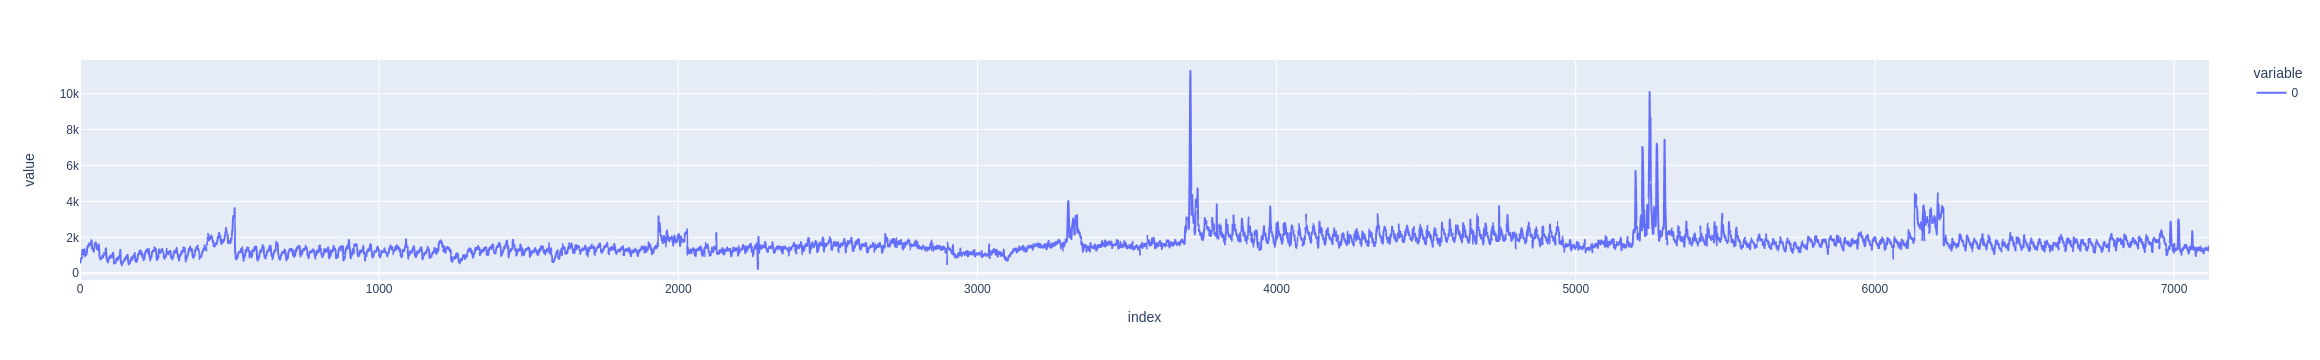

In [245]:
px.line(Saver.y)